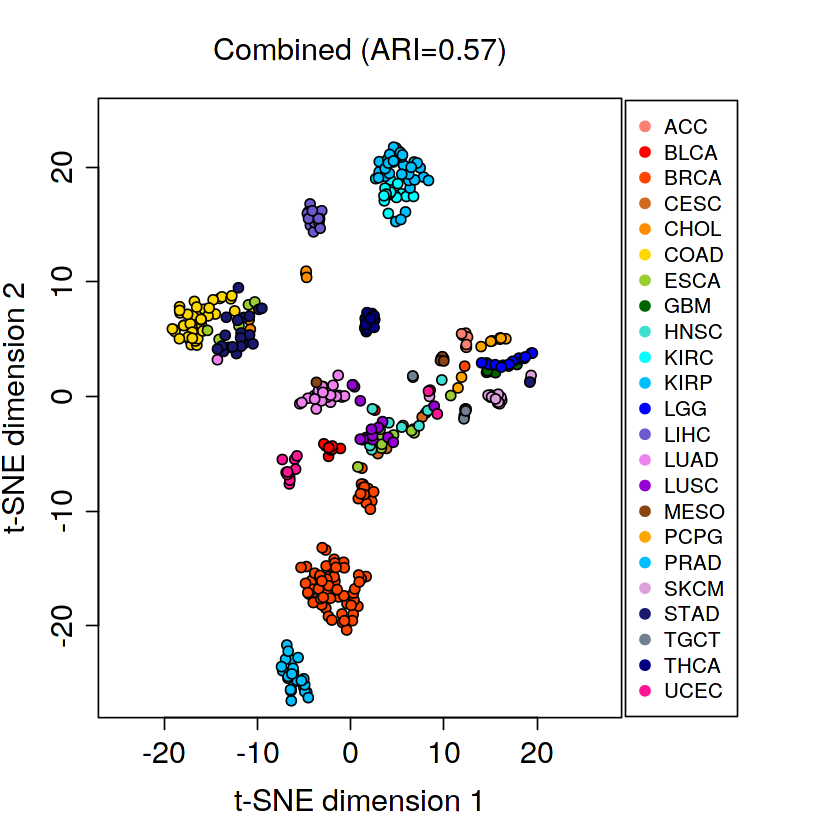

In [2]:
library(Rtsne)
library(pcaMethods)
library(extrafont)
library(mclust)


color_map<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/color_map.txt',sep='\t')
color_map1<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/BRCA/color_map.txt',sep='\t')
color_map2<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/ESCA/color_map.txt',sep='\t')


hyper.variable.peaks<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/proximal_and_distal_results/scaled_variance_combined.txt',sep='\t',header=T)

pcs<-pca(hyper.variable.peaks,
         nPcs=100)

colors<-list()
for(i in rownames(scores(pcs))){
    colors<-append(colors,as.character(color_map[i,'color']))
}
set.seed(42)
tsne_out<-Rtsne(scores(pcs)[,c(1:50)],dims=2)

k<-23

distance.matrix<-dist(scores(pcs)[,c(1:50)])
clusters<-hclust(distance.matrix,method="ward.D")
ARI<-adjustedRandIndex(as.character(cutree(clusters,k=k)),as.character(color_map$cancer_type))


par(xpd=T,mar=par()$mar+c(0,0,0,7),cex.main=1,font.main=1)

plot(tsne_out$Y[,1],tsne_out$Y[,2],col='black',pch=21,bg=as.character(colors),
     xlab='t-SNE dimension 1',ylab='t-SNE dimension 2',xlim=c(-25,27),ylim=c(-26,24),cex.lab=1.5,cex=1,cex.axis=1.5,cex.main=1.5,
     main=gettextf('Combined (ARI=%.2f)',ARI)
    )

color.map<-data.frame(cancer.type=c('ACC','BLCA','BRCA','CESC','CHOL','COAD','ESCA','GBM','HNSC',
                                           'KIRC','KIRP','LGG','LIHC','LUAD','LUSC','MESO','PCPG','PRAD',
                                           'SKCM','STAD','TGCT','THCA','UCEC'),
                             color=c('salmon','red','orangered','chocolate','darkorange','gold',
                                     'yellowgreen','darkgreen','turquoise','cyan','deepskyblue','blue',
                                     'slateblue','violet','darkviolet','saddlebrown','orange','deepskyblue',
                                     'plum','midnightblue','slategrey','navy','deeppink'))

legend(29.5,25.8,as.character(color.map$cancer.type),
       inset=0.0025,
       pch=c(19),
       col=as.character(color.map$color),ncol=1,
       xpd=T)



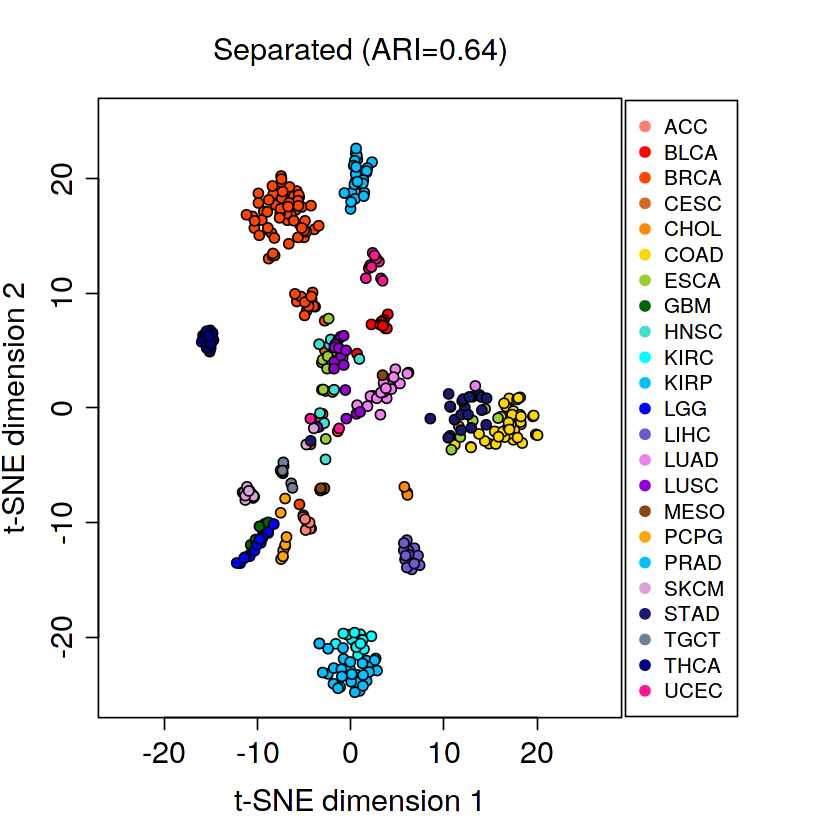

In [3]:
library(Rtsne)
library(pcaMethods)
library(extrafont)
library(mclust)


color_map<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/color_map.txt',sep='\t')
color_map1<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/BRCA/color_map.txt',sep='\t')
color_map2<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/ESCA/color_map.txt',sep='\t')


proximal.hyper.variable.peaks<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/proximal_and_distal_results/scaled_variance_proximal.txt',sep='\t',header=T)
distal.hyper.variable.peaks<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/TCGA_Pan_cancer_ATAC_seq_data_set/proximal_and_distal_results/scaled_variance_distal.txt',sep='\t',header=T)

pcs<-pca(cbind(distal.hyper.variable.peaks,proximal.hyper.variable.peaks),
         nPcs=100)

colors<-list()
for(i in rownames(scores(pcs))){
    colors<-append(colors,as.character(color_map[i,'color']))
}

set.seed(42)
tsne_out<-Rtsne(scores(pcs)[,c(1:50)],dims=2)

k<-23

distance.matrix<-dist(scores(pcs)[,c(1:50)])
clusters<-hclust(distance.matrix,method="ward.D")
ARI<-adjustedRandIndex(as.character(cutree(clusters,k=k)),as.character(color_map$cancer_type))

par(xpd=T,mar=par()$mar+c(0,0,0,7),cex.main=1,font.main=1)

plot(tsne_out$Y[,1],tsne_out$Y[,2],col='black',pch=21,bg=as.character(colors),
     xlab='t-SNE dimension 1',ylab='t-SNE dimension 2',xlim=c(-25,27),ylim=c(-25,25),cex.lab=1.5,cex=1,cex.axis=1.5,cex.main=1.5,
     main=gettextf('Separated (ARI=%.2f)',ARI)
    )

color.map<-data.frame(cancer.type=c('ACC','BLCA','BRCA','CESC','CHOL','COAD','ESCA','GBM','HNSC',
                                           'KIRC','KIRP','LGG','LIHC','LUAD','LUSC','MESO','PCPG','PRAD',
                                           'SKCM','STAD','TGCT','THCA','UCEC'),
                             color=c('salmon','red','orangered','chocolate','darkorange','gold',
                                     'yellowgreen','darkgreen','turquoise','cyan','deepskyblue','blue',
                                     'slateblue','violet','darkviolet','saddlebrown','orange','deepskyblue',
                                     'plum','midnightblue','slategrey','navy','deeppink'))

legend(29.5,26.8,as.character(color.map$cancer.type),
       inset=0.0025,
       pch=c(19),
       col=as.character(color.map$color),ncol=1,
       xpd=T)


